In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_excel("Final Robotic to Open Data.xlsx")
df

,SEX (2),Charleson Deyo Score (#Comorbidities),RACE (3),AGE,PRIMARY_SITE (2),LATERALITY (4),HISTOLOGY (14),TNM_PATH_T (4),TNM_PATH_N (3),TNM_PATH_M (5),ANALYTIC_STAGE_GROUP (4),Converted from Robotic to Open (2)
0,0,0,White,73,NaN,left,other,NaN,NaN,NaN,NaN,yes
1,0,1,white,82,adrenal cortex,right,adrenal cortical adenocarcinoma,p3,NaN,NaN,Stage 4,no
2,0,1,white,77,adrenal cortex,left,adrenal cortical adenocarcinoma,NaN,NaN,NaN,Stage 1,no
3,1,2,white,67,adrenal cortex,right,adrenal cortical adenocarcinoma,NaN,NaN,NaN,Stage 1,no
4,1,3,white,68,adrenal cortex,left,adrenal cortical adenocarcinoma,p2,NaN,NaN,Stage 2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
732,1,0,white,74,NaN,left,"small cell carcinoma, NOS",NaN,NaN,NaN,NaN,no
733,0,1,white,66,NaN,left,other,NaN,NaN,NaN,NaN,no
734,1,0,White,41,NaN,left,other,NaN,NaN,NaN,NaN,yes
735,1,0,white,73,NaN,right,other,NaN,NaN,NaN,NaN,no


In [60]:
df.isna().sum()

SEX (2)                                    0
Charleson Deyo Score (#Comorbidities)      0
RACE (3)                                   4
AGE                                        0
PRIMARY_SITE (2)                         407
LATERALITY (4)                             2
HISTOLOGY (14)                             1
TNM_PATH_T (4)                           608
TNM_PATH_N (3)                           680
TNM_PATH_M (5)                           680
ANALYTIC_STAGE_GROUP (4)                 413
Converted from Robotic to Open (2)         0
dtype: int64

In [64]:
for col in df.columns:
    print(col, df[col].unique())

SEX (2) [0 1]
Charleson Deyo Score (#Comorbidities) [0 1 2 3]
RACE (3) ['white' 'other' 'black' nan 'filipino']
AGE [73 82 77 67 68 49 62 53 59 64 69 63 78 79 57 87 40 58 54 66 72 74 61 43
 88 70 83 76 71 52 41 60 75 56 65 55 80 50 48 47 85 36 27 37 21 38 30 32
 34 26 35 28 33 45 81 51 44 42 46 25 39 31 84 20 18 86 29 23 24 22]
PRIMARY_SITE (2) [nan 'adrenalcortex' 'adrenalmedulla']
LATERALITY (4) ['left' 'right' nan 'unilateral,sidenotknown' 'bilateral']
HISTOLOGY (14) ['other' 'adrenalcorticaladenocarcinoma' 'carcinoidtumor,nos'
 'carcinoma,nos' 'clearcelladenocarcinoma' 'hemangiosarcoma'
 'leiomyosarcoma' 'invasivepheochromocytoma' 'in-situpheochromocytoma'
 'neuroblastoma' 'neuroendocrinecarcinoma' 'oxyphilicadenocarcinoma'
 'paragangliomamalignant' 'smallcellcarcinoma,nos' nan]
TNM_PATH_T (4) [nan 'p3' 'p2' 'p1' 'p4']
TNM_PATH_N (3) [nan 'p1' 'p0' 'c0']
TNM_PATH_M (5) [nan 'c0' 'p1' 'c1' 'pm1,cm1' 'pm0,cm0']
ANALYTIC_STAGE_GROUP (4) [nan 'stage4' 'stage1' 'stage2' 'stage3']
Conver

### multiple duplicated categories because of the white space and case difference.

In [63]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(' ','')
    df[col] = df[col].str.lower()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   SEX (2)                                737 non-null    int64 
 1   Charleson Deyo Score (#Comorbidities)  737 non-null    int64 
 2   RACE (3)                               733 non-null    object
 3   AGE                                    737 non-null    int64 
 4   PRIMARY_SITE (2)                       330 non-null    object
 5   LATERALITY (4)                         735 non-null    object
 6   HISTOLOGY (14)                         736 non-null    object
 7   TNM_PATH_T (4)                         129 non-null    object
 8   TNM_PATH_N (3)                         57 non-null     object
 9   TNM_PATH_M (5)                         57 non-null     object
 10  ANALYTIC_STAGE_GROUP (4)               324 non-null    object
 11  Converted from Robo

In [66]:
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [67]:
for col in df.columns:
    print(col, df[col].unique())

SEX (2) [0 1]
Charleson Deyo Score (#Comorbidities) [0 1 2 3]
RACE (3) [4 3 0 2 1]
AGE [73 82 77 67 68 49 62 53 59 64 69 63 78 79 57 87 40 58 54 66 72 74 61 43
 88 70 83 76 71 52 41 60 75 56 65 55 80 50 48 47 85 36 27 37 21 38 30 32
 34 26 35 28 33 45 81 51 44 42 46 25 39 31 84 20 18 86 29 23 24 22]
PRIMARY_SITE (2) [2 0 1]
LATERALITY (4) [1 3 2 4 0]
HISTOLOGY (14) [11  0  1  2  3  4  7  6  5  9 10 12 13 14  8]
TNM_PATH_T (4) [0 3 2 1 4]
TNM_PATH_N (3) [1 3 2 0]
TNM_PATH_M (5) [2 0 3 1 5 4]
ANALYTIC_STAGE_GROUP (4) [0 4 1 2 3]
Converted from Robotic to Open (2) [1 0]


In [124]:
df.AGE.describe()

count    737.000000
mean      57.312076
std       15.251970
min       18.000000
25%       47.000000
50%       59.000000
75%       68.000000
max       88.000000
Name: AGE, dtype: float64

In [68]:
df['Converted from Robotic to Open (2)'].value_counts()

Converted from Robotic to Open (2)
0    695
1     42
Name: count, dtype: int64

### imbalanced Dataset

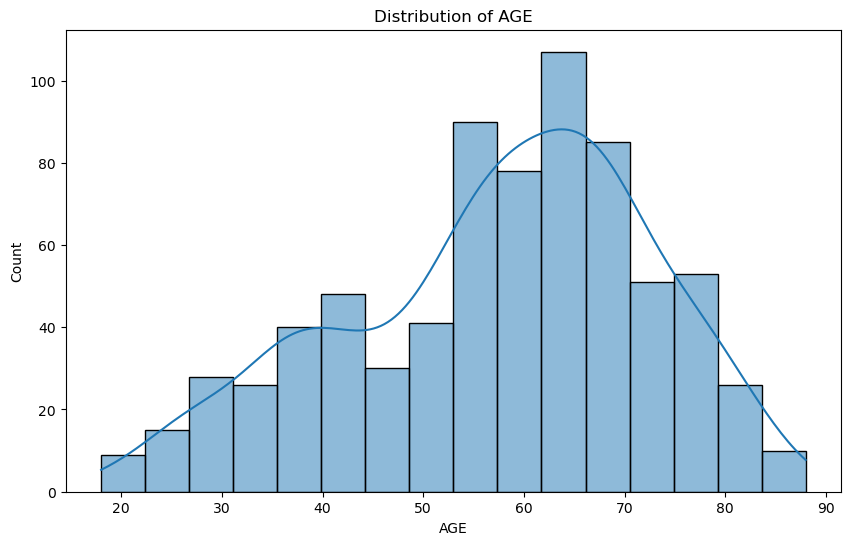

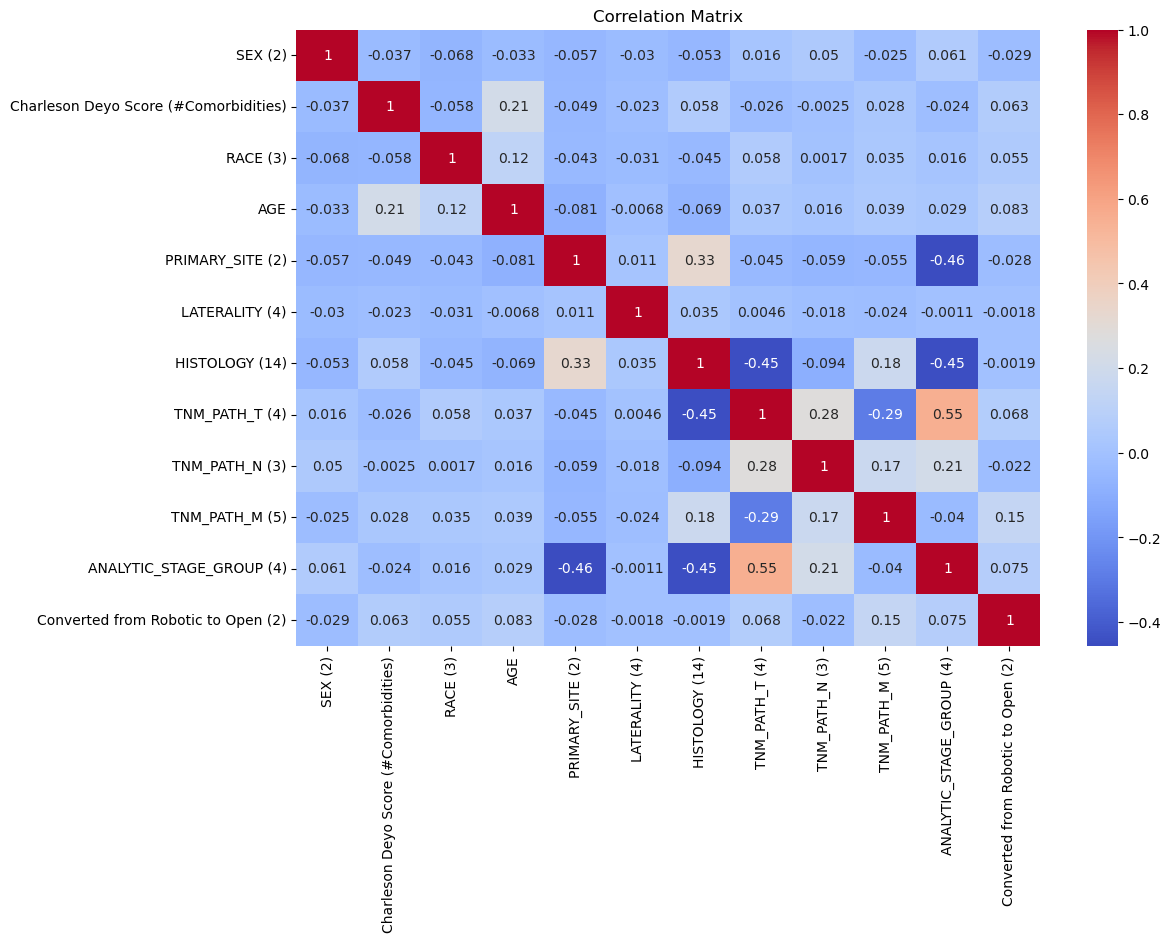

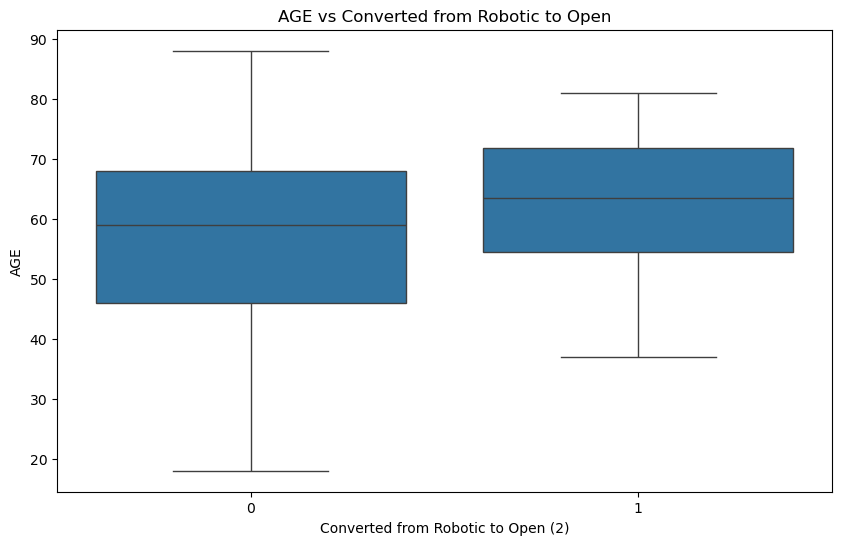

In [70]:
# Distribution of AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of AGE')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot for AGE vs Converted from Robotic to Open
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted from Robotic to Open (2)', y='AGE', data=df)
plt.title('AGE vs Converted from Robotic to Open')
plt.show()

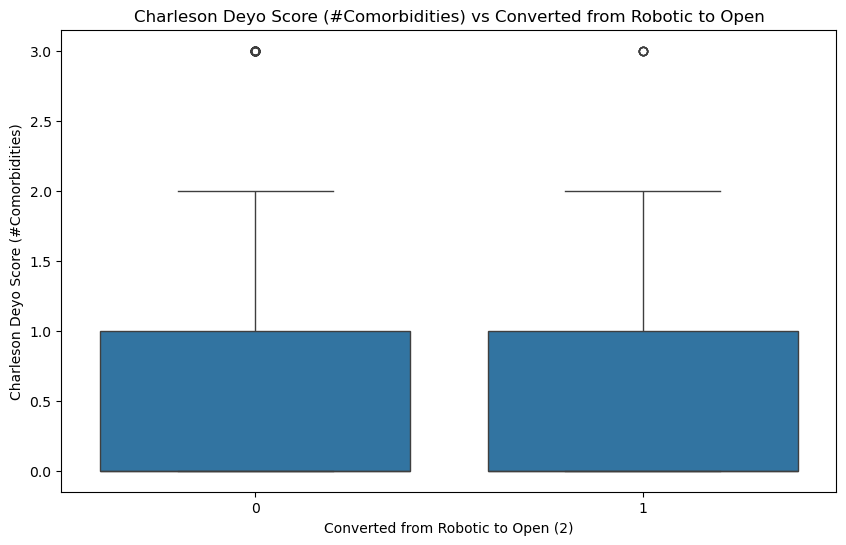

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted from Robotic to Open (2)', y='Charleson Deyo Score (#Comorbidities)', data=df)
plt.title('Charleson Deyo Score (#Comorbidities) vs Converted from Robotic to Open')
plt.show()

In [130]:
# Select features and target variable
features = ['SEX (2)', 'Charleson Deyo Score (#Comorbidities)', 'RACE (3)', 'AGE', 
            'PRIMARY_SITE (2)', 'LATERALITY (4)', 'HISTOLOGY (14)', 'TNM_PATH_T (4)', 
            'TNM_PATH_N (3)', 'TNM_PATH_M (5)', 'ANALYTIC_STAGE_GROUP (4)']
target = 'Converted from Robotic to Open (2)'

X = df[features]
y = df[target]

# Trying resampling with SMOTE

In [131]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=69)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
print(y_resampled.value_counts())

Converted from Robotic to Open (2)
1    695
0    695
Name: count, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=69)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7553956834532374
Confusion Matrix:
 [[104  41]
 [ 27 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       145
           1       0.72      0.80      0.76       133

    accuracy                           0.76       278
   macro avg       0.76      0.76      0.76       278
weighted avg       0.76      0.76      0.76       278



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9244604316546763
Confusion Matrix:
 [[131  14]
 [  7 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       145
           1       0.90      0.95      0.92       133

    accuracy                           0.92       278
   macro avg       0.92      0.93      0.92       278
weighted avg       0.93      0.92      0.92       278



In [90]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)
print('Logistic Regression CV Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print('Random Forest CV Scores:', cv_scores_rf)
print('Mean CV Score:', cv_scores_rf.mean())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression CV Scores: [0.36330935 0.62589928 0.70503597 0.73021583 0.66906475]
Mean CV Score: 0.618705035971223
Random Forest CV Scores: [0.48920863 0.70143885 0.87769784 0.93165468 0.9028777 ]
Mean CV Score: 0.7805755395683454


In [88]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                  Feature  Importance
3                                     AGE    0.350911
6                          HISTOLOGY (14)    0.128638
5                          LATERALITY (4)    0.098102
0                                 SEX (2)    0.075478
10               ANALYTIC_STAGE_GROUP (4)    0.072930
1   Charleson Deyo Score (#Comorbidities)    0.067622
4                        PRIMARY_SITE (2)    0.066605
2                                RACE (3)    0.053505
7                          TNM_PATH_T (4)    0.037737
9                          TNM_PATH_M (5)    0.030686
8                          TNM_PATH_N (3)    0.017786


# Trying Weighted Models

In [91]:
# Initialize Logistic Regression with class weights
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_weighted))
print('Classification Report:\n', classification_report(y_test, y_pred_weighted))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_weighted))

Accuracy: 0.6554054054054054
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78       137
           1       0.12      0.55      0.19        11

    accuracy                           0.66       148
   macro avg       0.53      0.60      0.49       148
weighted avg       0.89      0.66      0.74       148

Confusion Matrix:
 [[91 46]
 [ 5  6]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# Initialize Random Forest with class weights
rf_model_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=69)
rf_model_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_weighted = rf_model_weighted.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf_weighted))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_weighted))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf_weighted))

Accuracy: 0.918918918918919
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       137
           1       0.00      0.00      0.00        11

    accuracy                           0.92       148
   macro avg       0.46      0.50      0.48       148
weighted avg       0.86      0.92      0.89       148

Confusion Matrix:
 [[136   1]
 [ 11   0]]


## RF model biased because all points were predicted 0

In [95]:
# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model_weighted, X, y, cv=5)
print('Logistic Regression CV Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model_weighted, X, y, cv=5)
print('Random Forest CV Scores:', cv_scores_rf)
print('Mean CV Score:', cv_scores_rf.mean())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression CV Scores: [0.14864865 0.59459459 0.47619048 0.70068027 0.66666667]
Mean CV Score: 0.5173561316418459
Random Forest CV Scores: [0.5        0.83783784 0.93197279 0.94557823 0.9047619 ]
Mean CV Score: 0.8240301526015811


### Both ways indicates that RF model is better suited for the job but to maintain un-biased model, Resampling is necessary

In [114]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = { 'n_estimators': [50,100,150, 175],
                'max_depth': [20, 25, 27],
               'min_samples_split': [2],
               'min_samples_leaf': [1]}

# Initialize Random Forest

rf_model = RandomForestClassifier(random_state=69)

# Initialize GridCV

grid_search =GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_resampled, y_resampled)

print('Best Parameters:', grid_search.best_params_)
print('Best CV Score:', grid_search.best_score_)



Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score: 0.7928057553956835


# The Best score with RF model is 79.28%

Since XGB classifier performs better with complex data, we try XGB with default parameters

In [132]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=69)

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=69)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9064748201438849
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       145
           1       0.89      0.92      0.90       133

    accuracy                           0.91       278
   macro avg       0.91      0.91      0.91       278
weighted avg       0.91      0.91      0.91       278

Confusion Matrix:
 [[130  15]
 [ 11 122]]


### since XGB is performing better we can do a gridsearch for it as well but to preserve robustness of the model we will go with voting classifier. 

In [133]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
log_reg = LogisticRegression(random_state=69)
rf = RandomForestClassifier(max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150,random_state=69)
xgb = XGBClassifier(random_state=69)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_voting))
print('Classification Report:\n', classification_report(y_test, y_pred_voting))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_voting))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9136690647482014
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       145
           1       0.89      0.93      0.91       133

    accuracy                           0.91       278
   macro avg       0.91      0.91      0.91       278
weighted avg       0.91      0.91      0.91       278

Confusion Matrix:
 [[130  15]
 [  9 124]]


# Voting Classifier with logistic regression, random forest and xgb as voters, gives 91.37% accuracy with over 90% precision.

In [134]:
# Extract feature importance from individual models
feature_importances = {}

# Access the trained models from the Voting Classifier
for name, model in voting_clf.named_estimators_.items():
    if hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importances[name] = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):  # For Random Forest and XGBoost
        feature_importances[name] = model.feature_importances_
    else:
        print(f"{name} does not support feature importance.")

# Aggregate feature importance (e.g., average)
aggregated_importance = np.mean(list(feature_importances.values()), axis=0)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': aggregated_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

                                  Feature  Importance
9                          TNM_PATH_M (5)    0.556545
8                          TNM_PATH_N (3)    0.496306
0                                 SEX (2)    0.417379
4                        PRIMARY_SITE (2)    0.236686
7                          TNM_PATH_T (4)    0.179679
5                          LATERALITY (4)    0.167759
10               ANALYTIC_STAGE_GROUP (4)    0.147742
3                                     AGE    0.144538
1   Charleson Deyo Score (#Comorbidities)    0.109593
6                          HISTOLOGY (14)    0.077085
2                                RACE (3)    0.046359
